In [22]:
import pandas as pd
from pandas import Series
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import r2_score
import ml_metrics as metrics
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
import scipy
from scipy import stats
from statsmodels.tsa.arima_model import ARIMA
# from statsmodels.regression.linear_model.RegressionResults import resid

ModuleNotFoundError: No module named 'statsmodels.regression.linear_model.RegressionResults'; 'statsmodels.regression.linear_model' is not a package

,Value
Date,
1959-01-01,22.8331
1959-02-01,23.2802
1959-03-01,23.6156
1959-04-01,24.1186
1959-05-01,24.4820


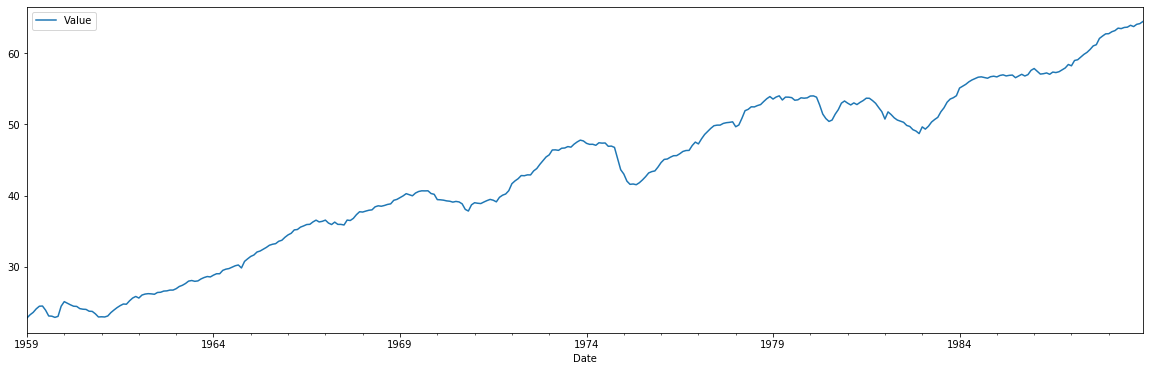

In [2]:
data = pd.read_excel('training.xlsx', index_col=0, header=0) 
data.plot(figsize=(20,6))
data.head()

In [3]:
data = data.sort_values(by="Date",axis=0,ascending=False) # еЇ№ж—¶й—ґй™ЌеєЏжЋ’е€—

z1 = list(data['Value'])
x = z1[1:len(z1)]
y = z1[0:len(z1)-1]

def fit(x,y):
    if len(x) != len(y):
        return
    numerator = 0.0
    denominator = 0.0
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    y_square=0.0
    for i in range(len(x)):
        numerator += (x[i]-x_mean)*(y[i]-y_mean)
        denominator += np.square((x[i]-x_mean))
    #print('numerator:',numerator,'denominator:',denominator)
        y_square+=np.square(x[i])
    b1 = numerator/denominator  # дј°и®Ўbeta
    b0 = y_mean - b1*x_mean     # дј°и®Ўж€Єи·ќйЎ№
    u_square = 0
    for i in range(len(y)):
        u_square += np.square(y[i] - b1 * x[i] - b0)

    s = ((u_square / (len(y) - 1)) ** 0.5) / (y_square ** 0.5) # дј°и®Ўbetaзљ„ж ‡е‡†е·®
    DF=(b0-1)/s  # жћ„йЂ DFз»џи®Ўй‡Џ

    interval1=stats.t.interval(0.9,len(y)-1) # 10%
    interval2=stats.t.interval(0.95,len(y)-1) # 5%
    interval3=stats.t.interval(0.99,len(y)-1) # 1%

    if DF<interval1[1] and DF>interval1[0]:
        DF1=0
    else:
        DF1=1 # е№ізЁі
    if DF<interval2[1] and DF>interval2[0]:
        DF2=0
    else:
        DF2=1
    if DF<interval3[1] and DF>interval3[0]:
        DF3=0
    else:
        DF3=1

    return b0,b1,s,DF,DF1,DF2,DF3
#ж€Єи·ќйЎ№пјЊbetaпјЊbetaж ‡е‡†е·®пјЊз»џи®Ўй‡Џ


print(fit(x,y))

(0.12828972520747328, 0.9997124878701937, 0.00044116523094672646, -1975.9269626073306, 1, 1, 1)


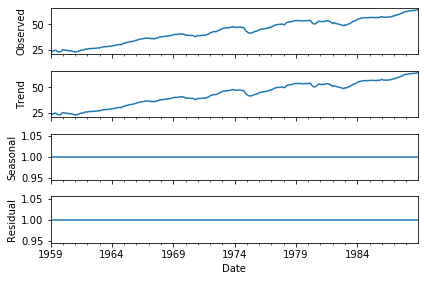

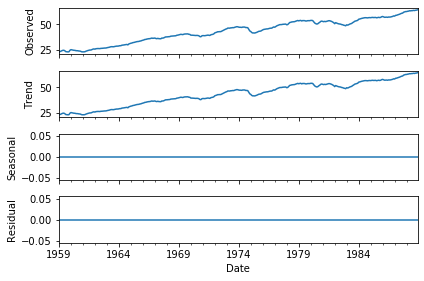

In [4]:
val = data.Value
result = seasonal_decompose(val, model='multiplicative', freq=1)
result.plot()
result1 = seasonal_decompose(val, model='additive', freq=1)
result1.plot()
plt.show()

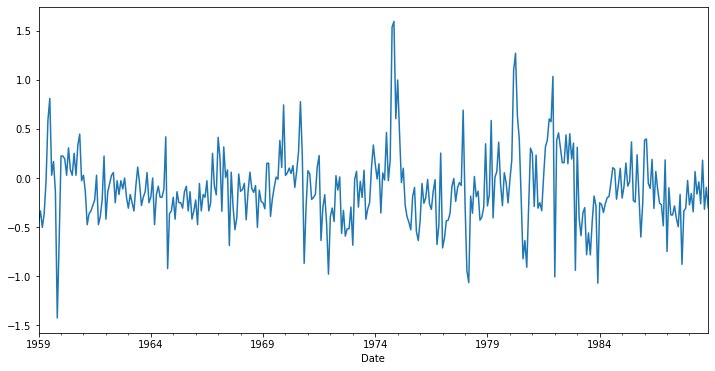

In [5]:
val1diff = val.diff(periods=1).dropna()
val1diff.plot(figsize=(12,6))

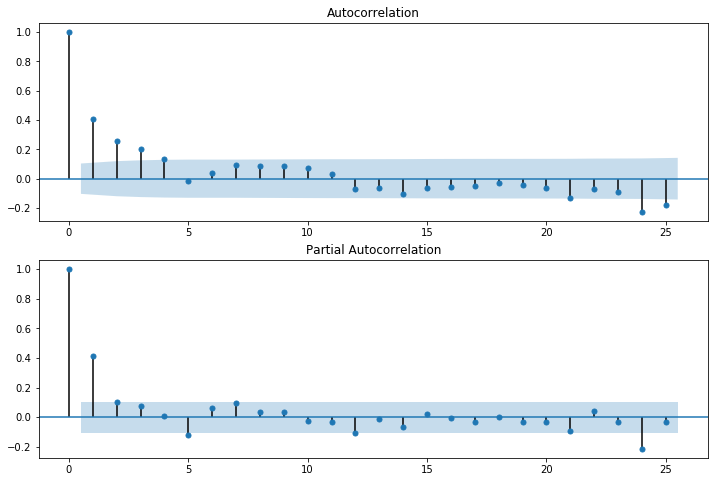

In [6]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(val1diff.values.squeeze(), lags=25, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(val1diff, lags=25, ax=ax2)

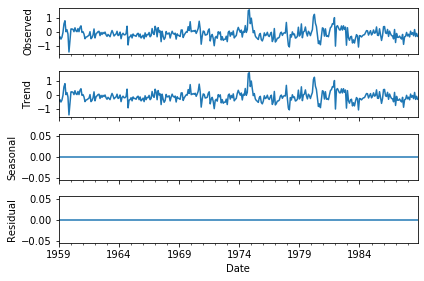

AttributeError: 'ARIMA' object has no attribute 'resid'

In [11]:
result1 = seasonal_decompose(val1diff, model='additive', freq=1)
result1.plot()
plt.show()

C:\Users\li_20\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\li_20\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Value   No. Observations:                  359
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -120.367
Method:                       css-mle   S.D. of innovations              0.338
Date:                Tue, 10 Dec 2019   AIC                            248.734
Time:                        21:36:17   BIC                            264.267
Sample:                    02-01-1959   HQIC                           254.911
                         - 12-01-1988                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1176      0.036      3.271      0.001       0.047       0.188
ar.L1.D.Value     0.6531      0.091      7.185      0.000       0.475       0.831
ma.L1.D.Value    -0.2984      0.115     

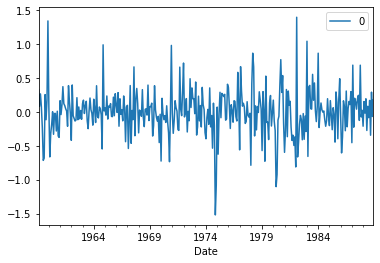

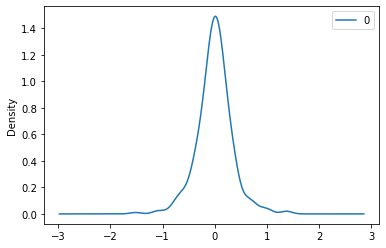

                0
count  359.000000
mean    -0.000681
std      0.338808
min     -1.519312
25%     -0.154532
50%      0.009669
75%      0.167922
max      1.399714


In [24]:
dat = pd.read_excel('training.xlsx', index_col=0, header=0) 
# fit model
model = ARIMA(dat, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())